In [40]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
print("Setting seaborn theme")
sns.set_theme(style="whitegrid")

Setting seaborn theme


In [42]:
print("Reading raw data file from csv")
df = pl.read_csv("../../data/raw/house_data.csv")
df.head()

Reading raw data file from csv


price,sqft,bedrooms,bathrooms,location,year_built,condition
i64,i64,i64,f64,str,i64,str
495000,1527,2,1.5,"""Suburb""",1956,"""Good"""
752000,2526,3,2.5,"""Downtown""",1998,"""Excellent"""
319000,1622,2,1.5,"""Rural""",1975,"""Fair"""
1210000,3102,4,3.0,"""Waterfront""",2005,"""Excellent"""
462000,1835,2,2.0,"""Urban""",1982,"""Good"""


In [43]:
print("Checking dataframe shape")
df.shape

Checking dataframe shape


(84, 7)

In [44]:
print("Printing schema")
df.schema

Printing schema


Schema([('price', Int64),
        ('sqft', Int64),
        ('bedrooms', Int64),
        ('bathrooms', Float64),
        ('location', String),
        ('year_built', Int64),
        ('condition', String)])

In [45]:
print("Checking for null values in dataframe columns")
df.null_count().sum()

Checking for null values in dataframe columns


price,sqft,bedrooms,bathrooms,location,year_built,condition
u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0


In [46]:
print("Dropping any null rows")
df = df.drop_nulls()

Dropping any null rows


In [47]:
df.columns

['price',
 'sqft',
 'bedrooms',
 'bathrooms',
 'location',
 'year_built',
 'condition']

In [48]:
print("Renaming columns")
df = df.rename({
    c: c.strip().lower().replace(" ", "_") for c in df.columns
})

Renaming columns


In [49]:
print("Listing column names after transformation")
df.columns

Listing column names after transformation


['price',
 'sqft',
 'bedrooms',
 'bathrooms',
 'location',
 'year_built',
 'condition']

In [50]:
df.describe()

statistic,price,sqft,bedrooms,bathrooms,location,year_built,condition
str,f64,f64,f64,f64,str,f64,str
"""count""",84.0,84.0,84.0,84.0,"""84""",84.0,"""84"""
"""null_count""",0.0,0.0,0.0,0.0,"""0""",0.0,"""0"""
"""mean""",628559.52381,2191.5,2.857143,2.190476,null,1982.047619,null
"""std""",359167.825027,650.017117,0.852252,0.828356,null,19.501563,null
"""min""",249000.0,1350.0,2.0,1.0,"""Downtown""",1947.0,"""Excellent"""
"""25%""",375000.0,1700.0,2.0,1.5,null,1965.0,null
"""50%""",512000.0,2010.0,3.0,2.0,null,1983.0,null
"""75%""",729000.0,2580.0,3.0,2.5,null,1995.0,null
"""max""",1.68e6,3850.0,5.0,4.5,"""Waterfront""",2019.0,"""Poor"""


In [51]:
print("Just describe numerical columns")
df.select(pl.selectors.numeric()).describe()

Just describe numerical columns


statistic,price,sqft,bedrooms,bathrooms,year_built
str,f64,f64,f64,f64,f64
"""count""",84.0,84.0,84.0,84.0,84.0
"""null_count""",0.0,0.0,0.0,0.0,0.0
"""mean""",628559.52381,2191.5,2.857143,2.190476,1982.047619
"""std""",359167.825027,650.017117,0.852252,0.828356,19.501563
"""min""",249000.0,1350.0,2.0,1.0,1947.0
"""25%""",375000.0,1700.0,2.0,1.5,1965.0
"""50%""",512000.0,2010.0,3.0,2.0,1983.0
"""75%""",729000.0,2580.0,3.0,2.5,1995.0
"""max""",1.68e6,3850.0,5.0,4.5,2019.0


In [52]:
print("Just describe categorical columns")
df.select(pl.selectors.string()).describe()

Just describe categorical columns


statistic,location,condition
str,str,str
"""count""","""84""","""84"""
"""null_count""","""0""","""0"""
"""mean""",null,null
"""std""",null,null
"""min""","""Downtown""","""Excellent"""
"""25%""",null,null
"""50%""",null,null
"""75%""",null,null
"""max""","""Waterfront""","""Poor"""


Plotting distribution of house prices


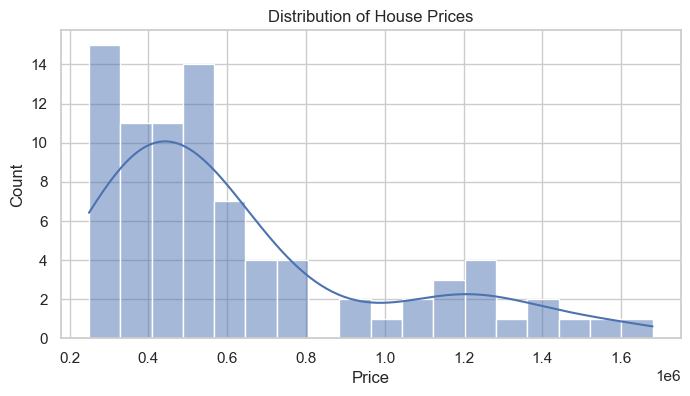

In [53]:
print("Plotting distribution of house prices")

plt.figure(figsize=(8, 4))
sns.histplot(df["price"], kde=True, bins = 18)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

In [54]:
print("Checking for the presence of duplicates")
print("Dropping if any duplicates found")
if df.is_duplicated().any():
    df = df.unique()

Checking for the presence of duplicates
Dropping if any duplicates found


In [55]:
print("Writing back filtered data to interim results")
df.write_csv("../../data/interim/cleaned_house_data_v1_pl.csv")

Writing back filtered data to interim results
